## Data Cleaning

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.text import Tokenizer
import seaborn as sns

In [16]:
# Load dataset
cleaned_df = pd.read_csv('suicide_detection_full_cleaned.csv') 
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello adam struggle year afraid past year...


In [17]:
import re

In [18]:
pattern = r'\b[-+]?\d*\.\d+\b'

In [19]:
def contains_digits(sentence):
     sentence_str = str(sentence)
     return bool(re.search(pattern, sentence_str))

In [20]:
filtered_df = cleaned_df[~cleaned_df['cleaned_text'].apply(contains_digits)]

In [22]:
filtered_df=filtered_df.fillna('')

In [13]:
#cleaned_df=filtered_df

In [14]:
#df=filtered_df

In [23]:
# Obtain word frequency 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_df['cleaned_text'])
word_freq = pd.DataFrame(tokenizer.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
     

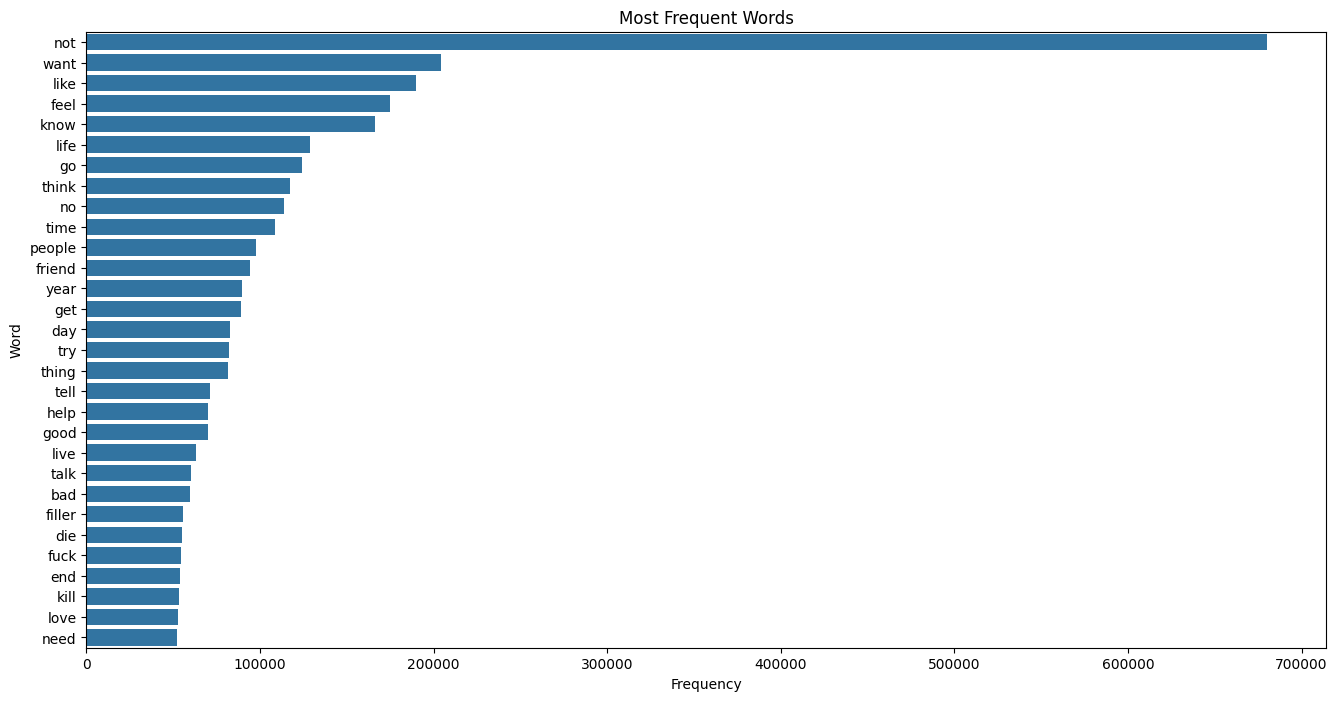

In [24]:
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq.iloc[:30])
plt.title('Most Frequent Words')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

In [26]:
# Remove anomalous "filler" word 
filtered_df['cleaned_text'] = filtered_df['cleaned_text'].str.replace('filler', '')

In [27]:
cleaned_df=filtered_df

### Remove rows that do not contain any words

In [28]:

# Remove rows with text length 0
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].apply(lambda x: len(x.split())!=0)]
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,lose hello adam struggle year afraid past year...


### Remove outliers in word count of texts

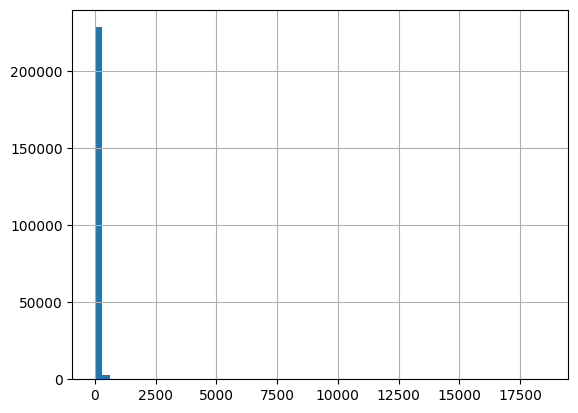

count    231919.000000
mean         52.121417
std          96.141531
min           1.000000
25%          11.000000
50%          24.000000
75%          61.000000
max       18561.000000
dtype: float64


In [29]:
# Get word count of posts 
posts_len = [len(x.split()) for x in cleaned_df['cleaned_text']]
pd.Series(posts_len).hist(bins=60)
plt.show()
print(pd.Series(posts_len).describe())

In [30]:
# Subset dataset to obtain rows with less than or equal to 62 words
cleaned_df = cleaned_df[cleaned_df['cleaned_text'].apply(lambda x: len(x.split())<=62)]
cleaned_df.reset_index(drop=True, inplace=True)

In [31]:
# Check dataset 
cleaned_df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,sex wife threaten suicide recently leave wife ...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know girl fee...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need help help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


In [32]:

# Export cleaned dataset 
cleaned_df.to_csv('suicide_detection_final_cleaned.csv', index=False)